# Explorative data analysis

First we will be working with an X-ray image of the human vertebra, `vertebra.png`. This type of images can for example be used for diagnosis of osteoporosis. A symptom is the so-called vertebral compression fracture. However, the diagnosis is very difficult to do based on x-rays alone.

**Exercise 1:** *Start by reading the image and inspect the histogram. Is it a *bimodal* histogram? Do you think it will be possible to segment it so only the bones are visible?* 


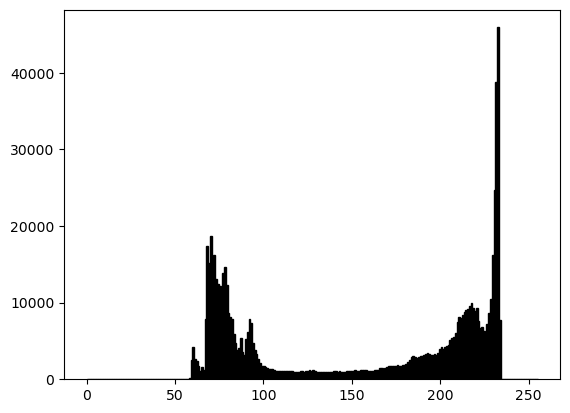

In [15]:
import matplotlib.pyplot as plt

img = plt.imread('data/vertebra.png')
img = img.ravel()*255 # I dunno why doesn't it work without the conversion, ig it's the format of the png??
plt.hist(img, bins=256, range=(0, 255), fc='k', ec='k')  # Update the range parameter
plt.show()

**Exercise 2:** *Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?*

min: 57
max: 235


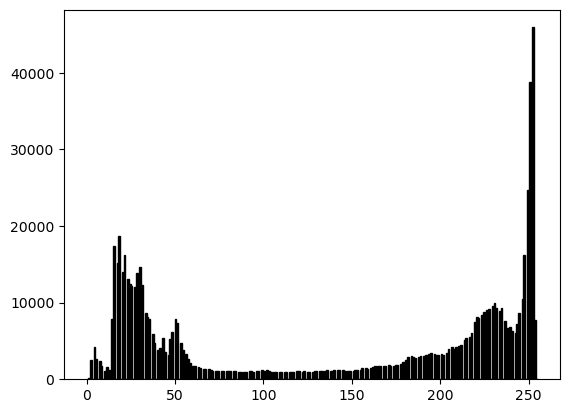

new min: 0
new max: 255


In [52]:
img = plt.imread('data/vertebra.png')
img = img.ravel()*255

print('min:', int(min(img)))
print('max:', int(max(img)))

img = (img - min(img)) * (255 / (max(img) - min(img)))

plt.hist(img, bins=256, range=(0, 255), fc='k', ec='k')  # Update the range parameter
plt.show()

print('new min:', int(min(img)))
print('new max:', int(max(img)))

**Exercise 3:** *Add an import statement to your script:*
```
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
```

*Read the image `vertebra.png` and compute and show the minumum and maximum values.*

*Use `img_as_float` to compute a new float version of your input image. Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?*

In [59]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

img = img_as_float('data/vertebra.png')
plt.imshow(img)


ValueError: Cannot convert from <U17 to float64.

**Exercise 4:** *Use `img_as_ubyte` on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?*

76.0

In [1]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2


def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)


def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    img_float = img_as_float(img)
    img_proc = 1 - img_float
    return img_as_ubyte(img_proc)


def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img


def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 1200, 10)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()


c:\Users\minni\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Starting image capture
Opening connection to camera
Starting camera loop


KeyboardInterrupt: 

: 